# Kresleni map
- struktury budeme davat do mapy
- pomoci seaborn + scikit-learn

In [95]:
from rdkit.Chem import AllChem as ch

#knihovny pro vypocet descriptoru (potrebujeme cislo)
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

#kresleni grafu
import seaborn
import matplotlib

#pro PCA
from sklearn import decomposition
from sklearn import preprocessing

#picking
#from sklearn.metrics.pairwise import euclidean_distances
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from math import sqrt

import pandas as pd

In [16]:
#nacteni drugbank
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
mols = [x for x in suppl if x is not None]

RDKit WARNING: [15:40:03]  S group DAT ignored on line 2516
RDKit WARNING: [15:40:03]  S group DAT ignored on line 2516
RDKit WARNING: [15:40:03]  S group DAT ignored on line 2516
RDKit WARNING: [15:40:03]  S group DAT ignored on line 2516
RDKit WARNING: [15:40:04]  S group DAT ignored on line 15552
RDKit WARNING: [15:40:04]  S group DAT ignored on line 15552
RDKit WARNING: [15:40:04]  S group DAT ignored on line 15552
RDKit WARNING: [15:40:04]  S group DAT ignored on line 15552
RDKit ERROR: [15:37:41] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:40:04] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:40:04] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:40:04] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:40:04] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:40:04]  S group GEN ignored on line 102860
RDKit ERROR: [15:40:04] ERROR: Explici

RDKit ERROR: [15:40:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:40:06] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:40:06] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:40:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:40:06] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:40:06] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [15:40:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:40:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:40:06] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [15:40:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:40:06] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [15:40:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:40:08]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [15:40:10] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:40:10] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:40:10] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:40:11]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [15:40:11] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:40:11] ERROR: Could not sanitize molecule ending on line 1151592


In [20]:
#napocitani deskriptoru (lipinskeho pravidel), ulozeno ve slovniku i v listu
drugbank = {}

lip_func = [Lipinski.NumHAcceptors,
           Lipinski.NumHDonors,
           Descriptors.ExactMolWt,
           Descriptors.MolLogP,
           rdMolDescriptors.CalcTPSA,
           Lipinski.NumRotatableBonds]

for mol in mols:
    drugbank[mol.GetProp('DRUGBANK_ID')] = [f(mol) for f in lip_func]
    
data = [[f(mol) for f in lip_func] for mol in mols]    

In [22]:
drugbank['DB00006']

[29, 28, 2178.9858128759984, -8.116429999999927, 901.5700000000003, 66]

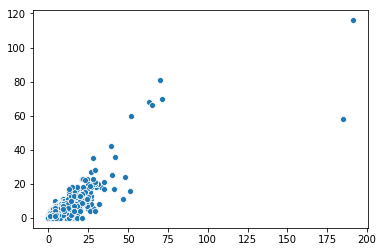

In [23]:
#seaborn.scatterplot(x,y)
#x,y ... souradnice kazdeho bodu
#hezci nez matplotlib
seaborn.scatterplot(x=[x[0] for x in data], y=[x[1] for x in data])

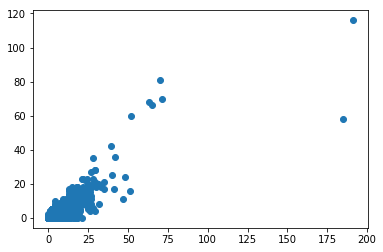

In [26]:
#v matplotlibu:
matplotlib.pyplot.scatter(x=[x[0] for x in data], y=[x[1] for x in data])

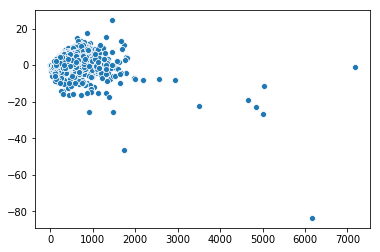

In [52]:
#hmotnost a log P
seaborn.scatterplot(x=[x[2] for x in data], y=[x[3] for x in data])

### PCA

In [47]:
#rekneme pocet hlavnich komponent, pak data
pca = decomposition.PCA(n_components=6)
pca.fit(data) #vypocet transformacni matice, tim se to nauci (pak mohu transformovat jina data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.transform(data)

array([[ 1.98829231e+03,  1.12596519e+02,  1.78036156e+01,
        -9.93147210e+00, -4.78202041e+00, -3.63786880e+00],
       [ 9.92954306e+02,  4.97778679e+01,  4.46003005e+00,
        -7.04094149e+00, -3.37181996e+00, -3.32084221e-01],
       [ 7.83997288e+02,  6.29521352e+01, -3.32281948e+00,
        -6.09910449e+00, -2.84785434e+00, -9.58530581e-01],
       ...,
       [ 8.15905643e+02,  1.64860179e+01, -9.36022417e+00,
        -3.19247374e+00,  2.08158603e+00,  1.95877807e+00],
       [-3.07390609e+01, -9.45020463e+00,  7.49072202e+00,
         3.19833860e+00, -1.20722169e+00, -2.54288644e+00],
       [ 3.78761398e+01, -4.81533216e+01, -4.18388289e+00,
        -9.96621996e-01, -3.42149323e-01, -6.80419834e-01]])

In [49]:
t_data = pca.transform(data)

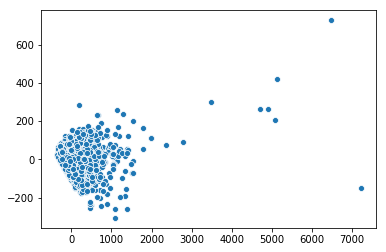

In [50]:
seaborn.scatterplot(x=[x[0] for x in t_data], y=[x[1] for x in t_data])

In [51]:
#ktera komponenta popisuje kolik dat (variabilitu)
#1. komponenta popisuje 96% -> neni to preskalovane (normalizovane), nejvetsi variance na osach s nejvetsich rozptylem
print(pca.explained_variance_ratio_)

[9.61313894e-01 3.83623944e-02 2.13088299e-04 5.62555916e-05
 3.59535321e-05 1.84137294e-05]


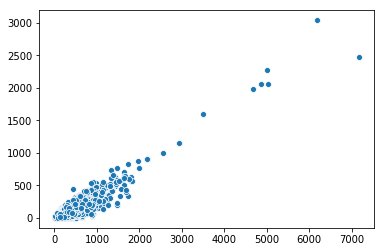

In [70]:
seaborn.scatterplot(x=[x[2] for x in data], y=[x[4] for x in data]) #velka variance v datech

### Normalizace dat

In [64]:
#normalizace dat:
n_data = preprocessing.scale(data)

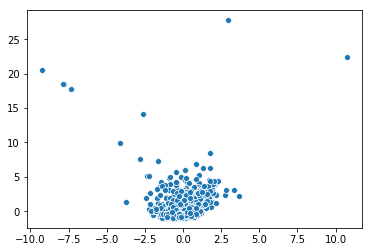

In [71]:
seaborn.scatterplot(x=[x[2] for x in t_data], y=[x[4] for x in n_data])

In [65]:
pca = decomposition.PCA(n_components=6)
pca.fit(n_data )

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
t_data = pca.transform(n_data )

In [67]:
print(pca.explained_variance_ratio_)

[0.73870005 0.17603981 0.04331457 0.02621776 0.0105667  0.00516111]


In [75]:
print(pca.singular_values_)

[177.51885525  86.65943925  42.98603823  33.44322945  21.2314757
  14.83822692]


In [74]:
print(pca.components_)

[[ 0.44328842  0.44234305  0.42223804 -0.24171234  0.46681877  0.39140569]
 [ 0.02683306  0.15565059 -0.38006175 -0.81825575  0.07730662 -0.39381108]
 [ 0.57877831 -0.21164655  0.28821015  0.19075348  0.07868135 -0.70326288]
 [ 0.37275837 -0.74891803 -0.03005062 -0.32903665 -0.13580548  0.41540545]
 [ 0.53238362  0.24206831 -0.7268014   0.32475857 -0.03636748  0.15145832]
 [ 0.21309602  0.34034684  0.25506801 -0.14802888 -0.86611053  0.04042805]]


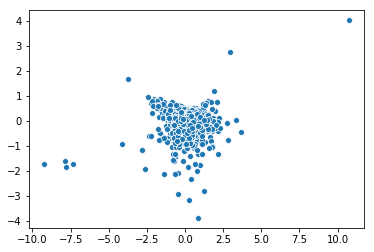

In [72]:
seaborn.scatterplot(x=[x[2] for x in t_data], y=[x[4] for x in t_data])

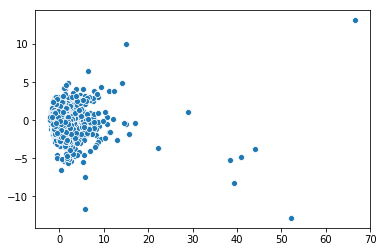

In [73]:
seaborn.scatterplot(x=[x[0] for x in t_data], y=[x[1] for x in t_data])

### Ukol: vyber diversni mnoziny a zobrazeni na teto mape
- pustit diversity picker
- lazy picking v nasem prostoru
- zobrazeni vybranych bodu v grafu

In [85]:
#funkce pro lazyPicker
def distance_function(index1, index2, *args):
    return sqrt(sum([(x-y)**2 for x,y in zip(n_data[index1],n_data[index2])])) #euklidovska vzdalenost

In [89]:
picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(n_data), 20, seed=666) )

In [90]:
picked #vybrane nejvzdalenejsi molekulz od sebe (pomoci pickeru)

[4980,
 523,
 4472,
 4501,
 454,
 1146,
 3034,
 2562,
 4502,
 4406,
 4386,
 591,
 6749,
 253,
 6657,
 6970,
 0,
 1010,
 3546,
 6845]

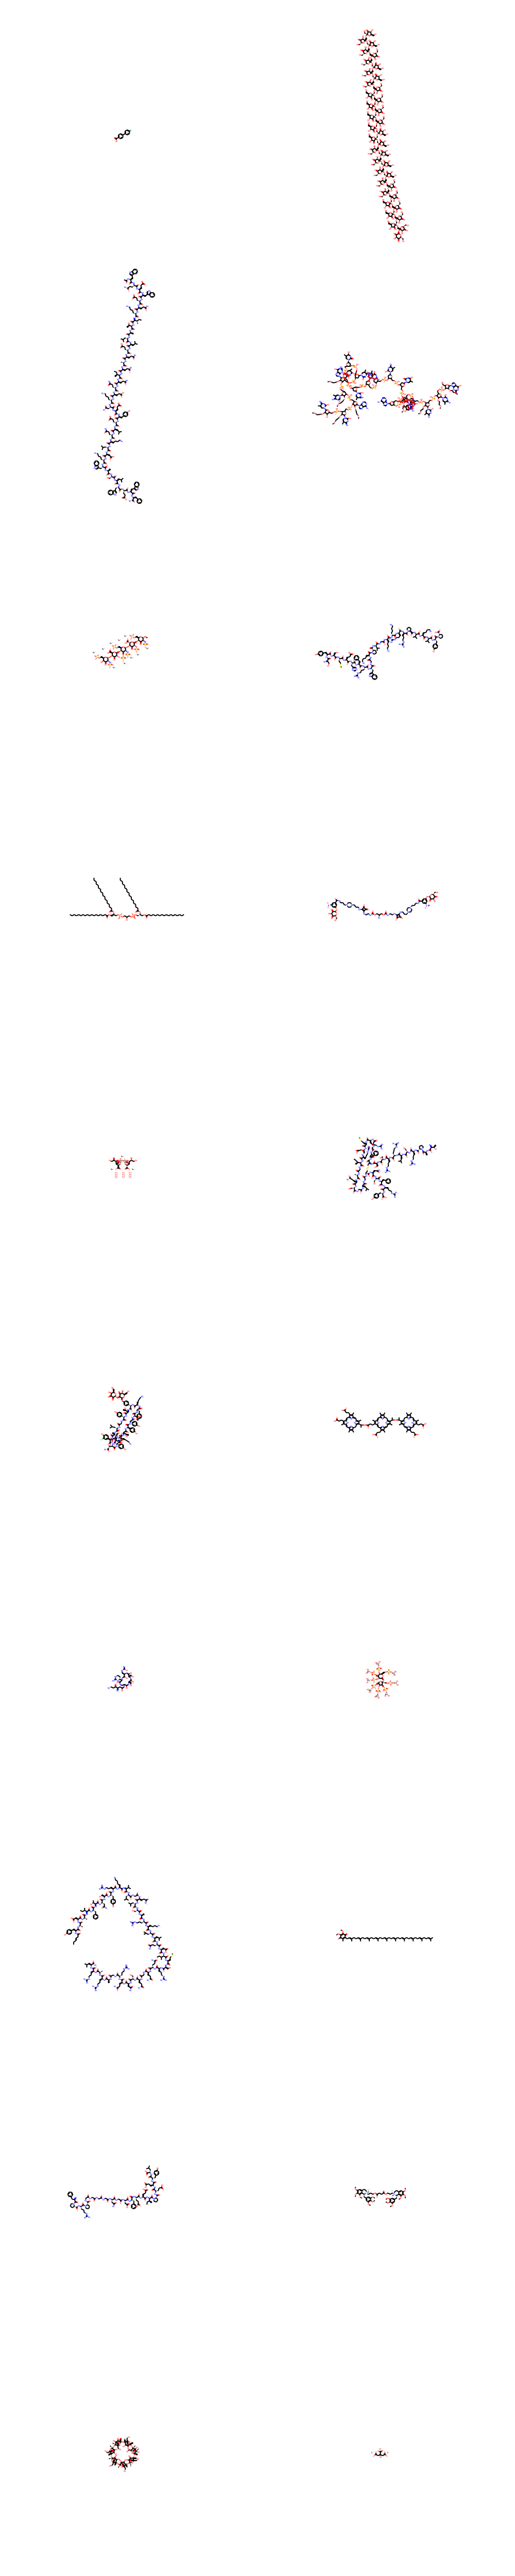

In [101]:
picked_molekules = [mols[i] for i in picked]
Draw.MolsToGridImage(picked_molekules[:], molsPerRow=2, 
                      subImgSize=(500, 500))

### + Obarveni bodu na cerveno v grafu

In [97]:
t_frame = pd.DataFrame(t_data, columns=["x","y","z","a","b","c"])

In [98]:
t_frame

,x,y,z,a,b,c
0,15.731797,-1.794264,-2.796199,-0.403379,-1.182441,-0.536701
1,7.665831,-0.609965,-1.140883,-0.915461,-0.688092,-0.140373
2,6.025037,0.437575,-0.222338,-0.844823,-0.751406,-0.196047
3,8.123199,-1.905362,-1.491888,-0.793996,-0.740935,-0.055795
4,3.410111,-1.960465,0.861818,0.033858,-1.328347,-0.125103
5,5.587201,0.346902,-0.153023,-0.391183,-0.783612,-0.175165
6,4.917130,-0.351705,-0.009281,-1.024014,-0.443691,0.297244
7,-0.132785,0.553824,-0.070207,-0.068041,0.142415,-0.174049
8,5.751473,-1.886675,1.638157,-0.649798,-0.664937,-0.560663
9,1.906293,0.490793,-0.178820,-0.614910,0.300541,-0.044103


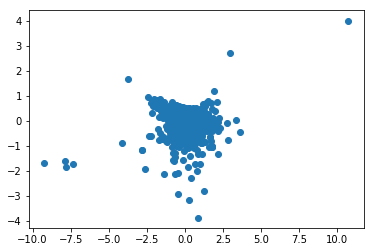

In [102]:
matplotlib.pyplot.scatter(x=[x[2] for x in t_data], y=[x[4] for x in t_data])

In [103]:
t_frame["picked"] = [x in picked for x in range(len(data))]
#t_frame["picked"] = [x in picked for x in enumerate(data)]

In [104]:
t_frame["picked"]

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7080    False
7081    False
7082    False
7083    False
7084    False
7085    False
7086    False
7087    False
7088    False
7089    False
7090    False
7091    False
7092    False
7093    False
7094    False
7095    False
7096    False
7097    False
7098    False
7099    False
7100    False
7101    False
7102    False
7103    False
7104    False
7105    False
7106    False
7107    False
7108    False
7109    False
Name: picked, Length: 7110, dtype: bool

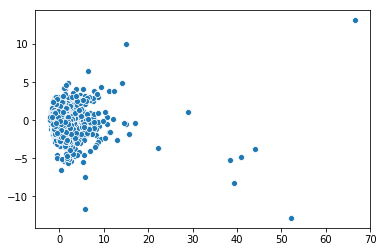

In [106]:
seaborn.scatterplot(x=[x[0] for x in t_data], y=[x[1] for x in t_data])

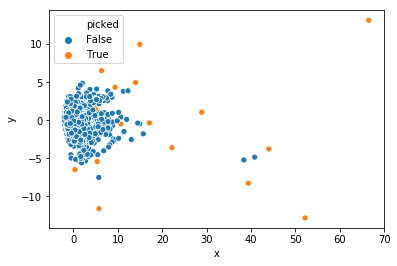

In [105]:
seaborn.scatterplot(x="x", y="y", data=t_frame, hue="picked")